Logistic Regression: Andrew Ng Machine Learning (from Octave to Jupyter Python notebook) ex2

In [7]:
import pandas as pd
import os
os.chdir('/Users/Alison/Desktop/BigData_Analytics/Andrew Ng/machine-learning-ex2/ex2')
# Load Data - The first two columns contains the X values and the third column contains the label (y).
df = pd.read_csv('ex2data1.txt', header=None)
X = df.iloc[:,0:2]
y = df.iloc[:,2]

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.



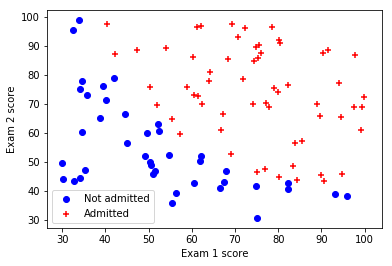

In [8]:
from matplotlib import pyplot as plt
# First plot the data to understand the problem we are working with.
print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.\n')
X0 = df.loc[df[2] == 0, [0,1]]
X1 = df.loc[df[2] == 1, [0,1]]
plt.scatter(X0[0], X0[1], marker='o', c='b', label='Not admitted')
plt.scatter(X1[0], X1[1], marker='+', c='r', label='Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()

In [9]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape
# Add intercept term to x and X_test
X.insert(loc=0, column='1s', value=1)

In [10]:
import numpy as np
# Initialize fitting parameters
initial_theta = pd.DataFrame(np.zeros((n+1, 1)))

def sigmoid(z):
    #SIGMOID Compute sigmoid function
    #g = SIGMOID(z) computes the sigmoid of z.
    g=1/(1+np.exp(-z))
    return g

def costFunction(theta, X, y):
    #COSTFUNCTION Compute cost for logistic regression
    #J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
    #parameter for logistic regression 
    m = y.shape[0] #number of training examples
    h=sigmoid(np.dot(theta.T,X.T))
    unregularized_cost = (1/m)*(np.dot(-y.T,np.log(h).T)-np.dot((1-y).T,np.log(1-h).T))
    J = unregularized_cost
    return J

def Grad(theta, X, y):
    #GRAD Compute gradient for logistic regression
    #grad = GRAD(theta, X, y) computes the gradient using theta as the
    #parameter for logistic regression
    m = y.shape[0] #number of training examples
    h=sigmoid(np.dot(theta.T,X.T))
    grad = (1/m)*np.dot(X.T,(h.T-y.to_frame()))
    return grad

# Compute and display initial cost and gradient
cost = costFunction(initial_theta, X, y)
grad = Grad(initial_theta, X, y)
print('Cost at initial theta (zeros):', cost[0])
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros): \n')
print(grad)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')

# Compute and display cost and gradient with non-zero theta
test_theta = pd.DataFrame([-24, 0.2, 0.2])
cost = costFunction(test_theta, X, y)
grad = Grad(test_theta, X, y)
print('\nCost at test theta:', cost[0])
print('Expected cost (approx): 0.218\n')
print('Gradient at test theta: \n')
print(grad)
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')

Cost at initial theta (zeros): 0.69314718056
Expected cost (approx): 0.693

Gradient at initial theta (zeros): 

[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


Cost at test theta: 0.218330193827
Expected cost (approx): 0.218

Gradient at test theta: 

[[ 0.04290299]
 [ 2.56623412]
 [ 2.64679737]]
Expected gradients (approx):
 0.043
 2.566
 2.647



In [11]:
#Use a built-in function to find the optimal parameters theta.

from scipy.optimize import fmin, fmin_bfgs
myargs=(X, y)
theta = fmin(costFunction, x0=initial_theta, args=myargs)

print('Cost at theta found by fmin:', costFunction(theta,X,y))
print('Expected cost (approx): 0.203')
print('theta:', theta)
print('Expected theta (approx): -25.161 0.206 0.201')


Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
Cost at theta found by fmin: 0.20349770159
Expected cost (approx): 0.203
theta: [-25.16130062   0.20623142   0.20147143]
Expected theta (approx): -25.161 0.206 0.201


Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.



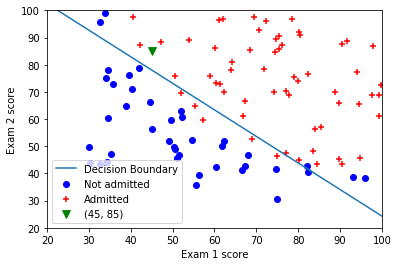

In [13]:
print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.\n')
plt.clf()
X0 = df.loc[df[2] == 0, [0,1]]
X1 = df.loc[df[2] == 1, [0,1]]
plt.plot([0,-theta[0]/theta[2]],[-theta[0]/theta[1],0], label='Decision Boundary') #Decision Boundary
plt.scatter(X0[0], X0[1], marker='o', c='b', label='Not admitted')
plt.scatter(X1[0], X1[1], marker='+', c='r', label='Admitted')
plt.scatter(45, 85, s=60, c='g', marker='v', label='(45, 85)')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.xlim(20, 100)
plt.ylim(20, 100)
plt.legend()
plt.show()

In [7]:
#Predict the outcomes on unseen data. 
#Predict the probability that a student with score 45 on exam 1 and score 85 on exam 2 will be admitted.
s=pd.Series([1, 45, 85])
prob = sigmoid(np.dot(s.T,theta))

print('For a student with scores 45 and 85, we predict an admission probability of', prob);
print('Expected value: 0.775 +/- 0.002');

For a student with scores 45 and 85, we predict an admission probability of 0.776290746405
Expected value: 0.775 +/- 0.002


In [9]:
#Compute accuracy on our training set
def predict (theta, X):
    #PREDICT Predict whether the label is 0 or 1 using learned logistic regression parameters theta
    #p = PREDICT(theta, X) computes the predictions for X using a threshold at 0.5 
    #(i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
    m = y.shape[0] #number of training examples
    p = sigmoid(np.dot(X,theta)) >= 0.5
    return p*1

p = predict(theta, X)
acc = sum((p == y)*1)/len(p) * 100
print (acc)
print('Expected accuracy (approx): 89.0')

89.0
Expected accuracy (approx): 89.0
